In [1]:
import argparse
import os

from PIL import Image

import numpy as np
import pandas as pd
import copy

import matplotlib
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
import cv2

/Users/lingrajsvannur/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
screen = 'Plate13'

data = pd.read_csv('cellprofiler_output.csv')
print(data.shape[0])
data = data[data['yeast_AreaShape_Area'] > 999]
n_cell = data.shape[0]

9


In [5]:
try:
    os.mkdir('cell_print_xy')
except OSError:
    print("Creation of the directory failed")
else:
    print("Successfully created the directory ")


sql_col_names = ['ImageNumber', 'Image_FileName_GFP1', 'Image_FileName_GFP2',
                 'yeast_AreaShape_Center_X', 'yeast_AreaShape_Center_Y', 'yeast_AreaShape_Area',
                 'yeast_Intensity_IntegratedIntensity_ResizeGFP2', 'yeast_Intensity_MeanIntensity_ResizeGFP2',
                 'yeast_Intensity_StdIntensity_ResizeGFP2', 'yeast_Intensity_MinIntensity_ResizeGFP2',
                 'yeast_Intensity_MaxIntensity_ResizeGFP2', 'yeast_Intensity_IntegratedIntensityEdge_ResizeGFP2']

Successfully created the directory 


In [6]:
basePath = '/Users/lingrajsvannur/Downloads/Resized_1_5_linear/'
cropSize = 60


imSize = 64
numClasses = 19
numChan = 1


croppedCells = np.zeros((n_cell, imSize ** 2 * 2))
coordUsed = np.zeros((n_cell, 2))

ind = 0

#selected_wells = []
wellNames = []

GFP_images = np.unique(data['Image_FileName_GFP2'])
GFP_images.sort()
wells = np.unique([seq[0:8] for seq in GFP_images])


In [7]:
wells

array(['001001-1'], dtype='<U8')

In [10]:
for well in wells:
    print(well)
    # if well[0:6] != prewell[0:6]:
    # break
    #G_array = G_arrays[int(frame/2)]
    #R_array = R_arrays[int(frame/2)]
    G_array = io.imread(basePath+well+'-001001004.tif')
    #R_array = io.imread(basePath+'Resized_1_5_linear/'+well+'-001001003.tif')
    B_array = io.imread(basePath+well+'-001001001.tif')
    #GFPImg_L=GFPImg.resize((2160, 2160),Image.NEAREST)
    # GFPImg.save(self.basePath+'tif_file/'+well+'-001001002thumbnail.tif')
    #GFPImg_L = Image.open(self.basePath+'tif_file/'+well+'-001001002thumbnail.tif')
    #G_array = GFPImg.read_image()
    print(G_array.shape)
    curCoordinates = data[data['Image_FileName_GFP2'] == well + '-001001004.tif'][
        ['yeast_AreaShape_Center_X',
         'yeast_AreaShape_Center_Y']]

    #RFPImg = Image.open(self.basePath+'resized_1_5/'+well+'-001001003processed_boundary.tiff')
    #RFPImg_L=RFPImg.resize((2160, 2160),Image.NEAREST)
    #R_array = np.zeros((G_array.shape))

    coord = 0
    while coord < len(curCoordinates):
        cur_y, cur_x = curCoordinates.values[coord]

        if (cur_x - imSize / 2 > 0 and cur_x + imSize / 2 < G_array.shape[0] and
           cur_y - imSize / 2 > 0 and cur_y + imSize / 2 < G_array.shape[1]):
            croppedCells[ind, : imSize ** 2] = (
                G_array[int(np.floor(cur_x - imSize / 2)):int(np.floor(cur_x + imSize / 2)),
                        int(np.floor(cur_y - imSize / 2)):int(np.floor(cur_y + imSize / 2))]).ravel()

            croppedCells[ind, imSize ** 2:] = (
                B_array[int(np.floor(cur_x - imSize / 2)):int(np.floor(cur_x + imSize / 2)),
                        int(np.floor(cur_y - imSize / 2)):int(np.floor(cur_y + imSize / 2))]).ravel()

            coordUsed[ind, :] = [cur_y, cur_x]

            coord += 1

            wellNames.append(well)

            cell_arrayB = B_array[int(np.floor(cur_x - imSize / 2)):int(np.floor(
                cur_x + imSize / 2)), int(np.floor(cur_y - imSize / 2)):int(np.floor(cur_y + imSize / 2))]
            cell_arrayG = G_array[int(np.floor(cur_x - imSize / 2)):int(np.floor(
                cur_x + imSize / 2)), int(np.floor(cur_y - imSize / 2)):int(np.floor(cur_y + imSize / 2))]
            #rgbArray = np.zeros((64,64,3), 'uint8')
            #rgbArray[..., 0]=cell_arrayR
            #rgbArray[..., 1]=cell_arrayG
            #rgbArray[..., 2]=np.zeros(cell_arrayR.shape)
            cell_GFP = Image.fromarray(cell_arrayG)
            cell_nucli = Image.fromarray(cell_arrayB)

            cell_GFP.save('cell_print_xy/'+well+'_' +
                          str(cur_y)+'_'+str(cur_x)+'_GFP.tif')
            cell_nucli.save('cell_print_xy/'+well +
                            '_'+str(cur_y)+'_'+str(cur_x)+'_nucli.tif')
            ind += 1

        else:
            coord += 1


curCroppedCells = croppedCells[:ind]
print(n_cell)
print(croppedCells.shape)
#intensityUsed = intensityUsed[:ind]
print(coordUsed.shape)



001001-1
(1620, 1620)
5
(5, 8192)
(5, 2)


In [12]:
import skimage

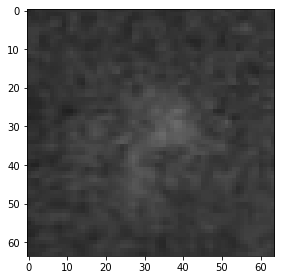

In [20]:
img = skimage.io.imread("/Users/lingrajsvannur/Desktop/AutoML/cellprofilebuck/cell_print_xy/001001-1_281.0758693361433_495.3983140147524_GFP.tif")


In [ ]:
skimage.io.imshow(img)

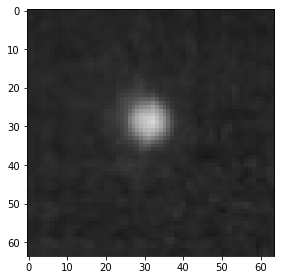

In [21]:
img = skimage.io.imread("/Users/lingrajsvannur/Desktop/AutoML/cellprofilebuck/cell_print_xy/001001-1_1341.8990384615386_669.2298076923076_nucli.tif")
skimage.io.imshow(img)

In [22]:
img.shape

(64, 64)